### 참조 Site :  [데이터싸이언스스쿨](https://datascienceschool.net/02%20mathematics/03.05%20PCA.html)
https://datascienceschool.net/02%20mathematics/03.05%20PCA.html

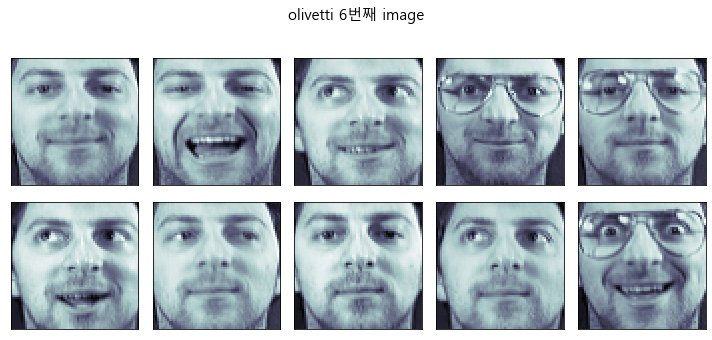

In [59]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic') #plot 내 한글폰트

faces_all = fetch_olivetti_faces()
K = 6  # 20번 인물의 사진만 선택

faces = faces_all.images[faces_all.target == K]

N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=0.8, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(faces[k].reshape(64, 64), cmap=plt.cm.bone)
        ax.xaxis.set_ticks([]),ax.yaxis.set_ticks([]) #축 label remove
plt.suptitle("olivetti "+str(K)+"번째 image",fontsize=15)
plt.tight_layout() #자동 layout
plt.show()

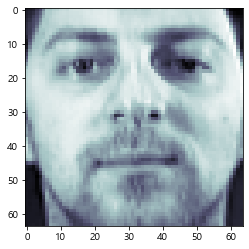

In [85]:
plt.imshow(faces[7].reshape(64, 64), cmap=plt.cm.bone)

In [218]:
from sklearn.decomposition import PCA
pca3 = PCA(n_components=3)
X3 = faces_all.data[faces_all.target == K]
W3 = pca3.fit_transform(X3)
X32 = pca3.inverse_transform(W3)

In [219]:
#help(pca3)
#faces_all.target

In [221]:
pca3.explained_variance_ratio_,np.cumsum(pca3.explained_variance_ratio_)

(array([0.3880022 , 0.16170448, 0.13600774], dtype=float32),
 array([0.3880022, 0.5497067, 0.6857144], dtype=float32))

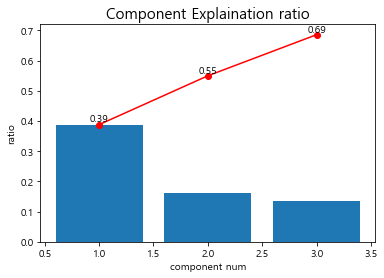

In [222]:
#componets selection
import numpy as np

N=len(pca3.singular_values_)+1 #component 수

x=np.arange(1,N) #주성분수
y=np.cumsum(pca3.explained_variance_ratio_) # explained_variance_ratio_ 설명력=설명비율
z=pca3.explained_variance_ratio_
plt.plot(x,y,'o-',color='r')
plt.bar(x,z)

for x,y in zip(x,y):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,3), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.title("Component Explaination ratio",fontsize=15)
plt.xlabel("component num")
plt.ylabel("ratio")
plt.show()

In [223]:
x

3

In [224]:
sum(pca3.explained_variance_ratio_)

0.6857144087553024

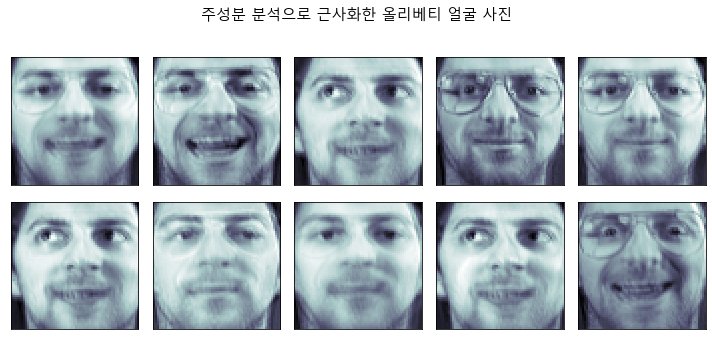

In [225]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=0.8, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(X32[k].reshape(64, 64), cmap=plt.cm.bone)
        ax.xaxis.set_ticks([]),ax.yaxis.set_ticks([])
plt.suptitle("주성분 분석으로 근사화한 올리베티 얼굴 사진",fontsize=15)
plt.tight_layout()
plt.show()

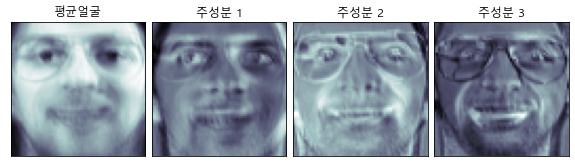

In [226]:
face_mean = pca3.mean_.reshape(64, 64)
face_p1 = pca3.components_[0].reshape(64, 64)
face_p2 = pca3.components_[1].reshape(64, 64)
face_p3 = pca3.components_[2].reshape(64, 64)

N=4

pca=[face_mean,face_p1,face_p2, face_p3]
pca_d=["평균얼굴","주성분 1","주성분 2","주성분 3"]
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

for i,j,k in zip(pca,pca_d,range(N)):
    ax = fig.add_subplot(1, N, k+1)
    ax.imshow(i.reshape(64, 64), cmap=plt.cm.bone)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.set_title(j)

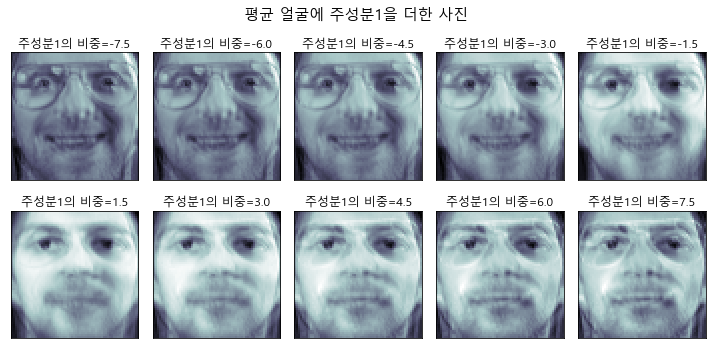

In [192]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=0.8, bottom=0.1, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        w = 1.5 * (k - 5) if k < 5 else 1.5 * (k - 4)
        ax.imshow(face_mean + w *face_p1, cmap=plt.cm.bone)
        ax.xaxis.set_ticks([]), ax.yaxis.set_ticks([])
        plt.title("주성분1의 비중={}".format(w))
plt.suptitle("평균 얼굴에 주성분1을 더한 사진",fontsize=15)
plt.tight_layout()
plt.show()

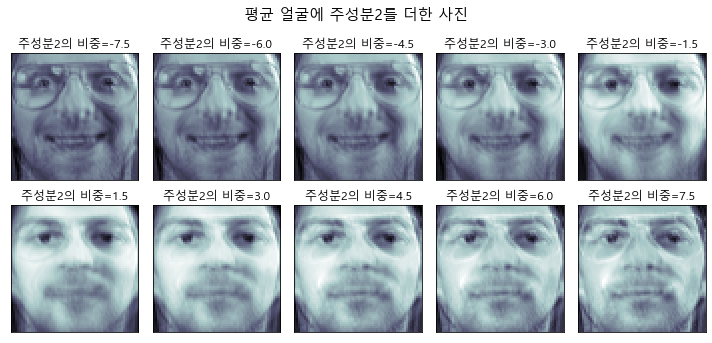

In [193]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=0.8, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        w = 1.5 * (k - 5) if k < 5 else 1.5 * (k - 4)
        ax.imshow(face_mean+ w* face_p2, cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("주성분2의 비중={:.1f}".format(w))
plt.suptitle("평균 얼굴에 주성분2를 더한 사진",fontsize=15)
plt.tight_layout()
plt.show()